# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Using Google Drive

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [1]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('SP500.csv')

data = pd.read_csv('CPIAUCSL_PC1.csv')

## Step 1 | Data Preparation

Turn your data into something you can explore through data operations.

In [5]:
# Data operations here
# Load and merge SP500 data and CPi data
sp500_data = pd.read_csv('SP500.csv')

data['observation_date'] = pd.to_datetime(data['observation_date'])
sp500_data['observation_date'] = pd.to_datetime(sp500_data['observation_date'])

merged_data = pd.merge(data, sp500_data, on='observation_date', how='inner')


merged_data['CPIAUCSL_PC1_sq'] = merged_data['CPIAUCSL_PC1']**2


In [6]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis

Summarize the main variables and relationships of interest.

In [ ]:
# Exploratory Data Analysis here

In this project, SP500 measures the level or performance of the S&P 500 index, and CPIAUCSL_PC1 measures the percent change in CPI (inflation). In the EDA, I look at the basic behavior of each variable, their typical values (means/medians), how much they move around (spread/volatility), and whether there are any big spikes or crashes that stand out over time.

Direction – Do stock returns tend to be higher when inflation is higher, or lower?

Strength – Are the points tightly bunched around a line (strong relationship) or widely scattered (weak relationship)?

Form & outliers – Does the pattern look roughly linear or more curved, and are there any extreme points that don’t fit the general trend?

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis
2. Write down your statistical model
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

1. 0: B(1) = 0 (There is no linear relationship between CPI inflation and S&P 500 returns). The alternative hypothesis would be HA: B(1) ≠ 0 (There is a linear relationship).

2. S&P500return(t) = B(0) + B(1)CPIinflation(t) + ε(t)

In [7]:
# Build and run the linear model as specified by the user:
# S&P500 ~ CPIAUCSL_PC1
model_linear_cpi = smf.ols('SP500 ~ CPIAUCSL_PC1', data=merged_data).fit()

print("\nSummary for linear model with CPIAUCSL_PC1 term:")
print(model_linear_cpi.summary())


Summary for linear model with CPIAUCSL_PC1 term:
                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     14.70
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           0.000488
Time:                        20:10:47   Log-Likelihood:                -295.23
No. Observations:                  38   AIC:                             594.5
Df Residuals:                      36   BIC:                             597.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [15]:
# Polynomial Regression (Quadratic Model)
# S&P500 ~ CPI + CPI^2
model_poly_cpi = smf.ols('SP500 ~ CPIAUCSL_PC1 + CPIAUCSL_PC1_sq', data=merged_data).fit()

print("Summary for polynomial model (Quadratic):")
print(model_poly_cpi.summary())

Summary for polynomial model (Quadratic):
                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     8.220
Date:                Fri, 12 Dec 2025   Prob (F-statistic):            0.00118
Time:                        20:13:53   Log-Likelihood:                -294.42
No. Observations:                  38   AIC:                             594.8
Df Residuals:                      35   BIC:                             599.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------


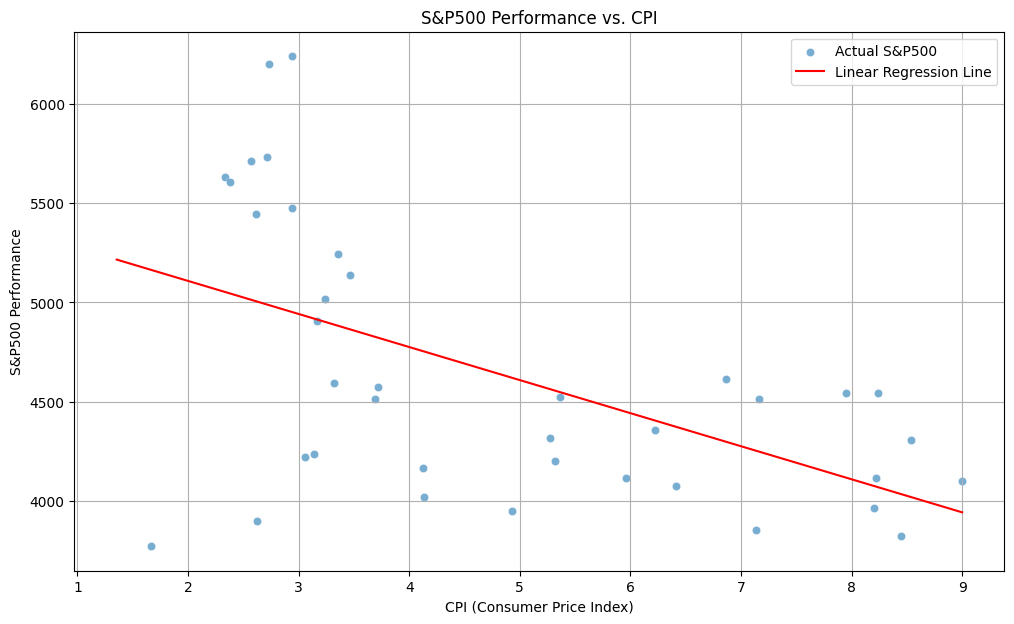

Linear model fit.


In [14]:
merged_data['linear_predicted'] = model_linear_cpi.predict(merged_data)
merged_data['linear_residuals'] = model_linear_cpi.resid

# Plot actual vs predicted with regression line for the best model
plt.figure(figsize=(12, 7))
sns.scatterplot(x='CPIAUCSL_PC1', y='SP500', data=merged_data, label='Actual S&P500', alpha=0.6)
sns.lineplot(x='CPIAUCSL_PC1', y='linear_predicted', data=merged_data, color='red', label='Linear Regression Line')
plt.xlabel('CPI (Consumer Price Index)')
plt.ylabel('S&P500 Performance')
plt.title('S&P500 Performance vs. CPI')
plt.grid(True)
plt.legend()
plt.show()


print("Linear model fit.")

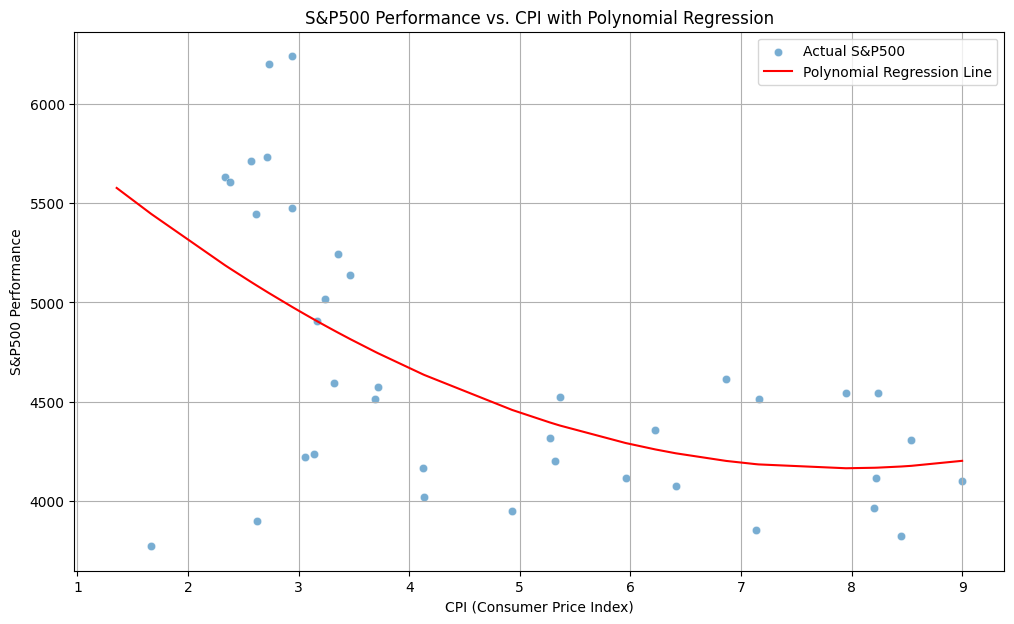

Polynomial model visualization generated.


In [17]:
# Predict using the polynomial model
merged_data['poly_predicted'] = model_poly_cpi.predict(merged_data)

# Sort data for smooth line plotting
sorted_data = merged_data.sort_values(by='CPIAUCSL_PC1')

# Plot actual vs predicted with polynomial regression line
plt.figure(figsize=(12, 7))
sns.scatterplot(x='CPIAUCSL_PC1', y='SP500', data=merged_data, label='Actual S&P500', alpha=0.6)
sns.lineplot(x='CPIAUCSL_PC1', y='poly_predicted', data=sorted_data, color='red', label='Polynomial Regression Line')
plt.xlabel('CPI (Consumer Price Index)')
plt.ylabel('S&P500 Performance')
plt.title('S&P500 Performance vs. CPI with Polynomial Regression')
plt.grid(True)
plt.legend()
plt.show()

print("Polynomial model visualization generated.")

Text(0, 0.5, 'Frequency')

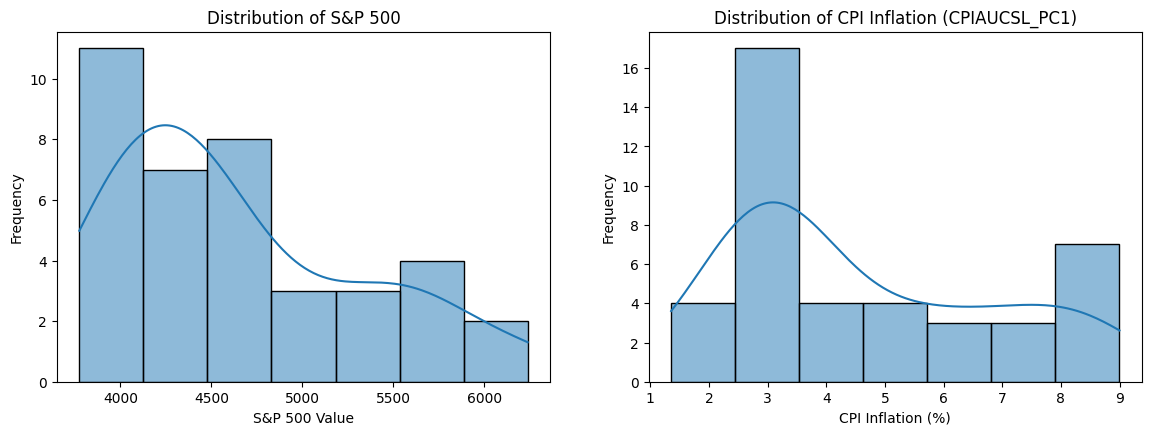

In [10]:
# --- Histograms ---

plt.figure(figsize=(14, 10))

# Histogram for SP500
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot
sns.histplot(merged_data['SP500'].dropna(), kde=True)
plt.title('Distribution of S&P 500')
plt.xlabel('S&P 500 Value')
plt.ylabel('Frequency')

# Histogram for CPIAUCSL_PC1
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot
sns.histplot(merged_data['CPIAUCSL_PC1'].dropna(), kde=True)
plt.title('Distribution of CPI Inflation (CPIAUCSL_PC1)')
plt.xlabel('CPI Inflation (%)')
plt.ylabel('Frequency')


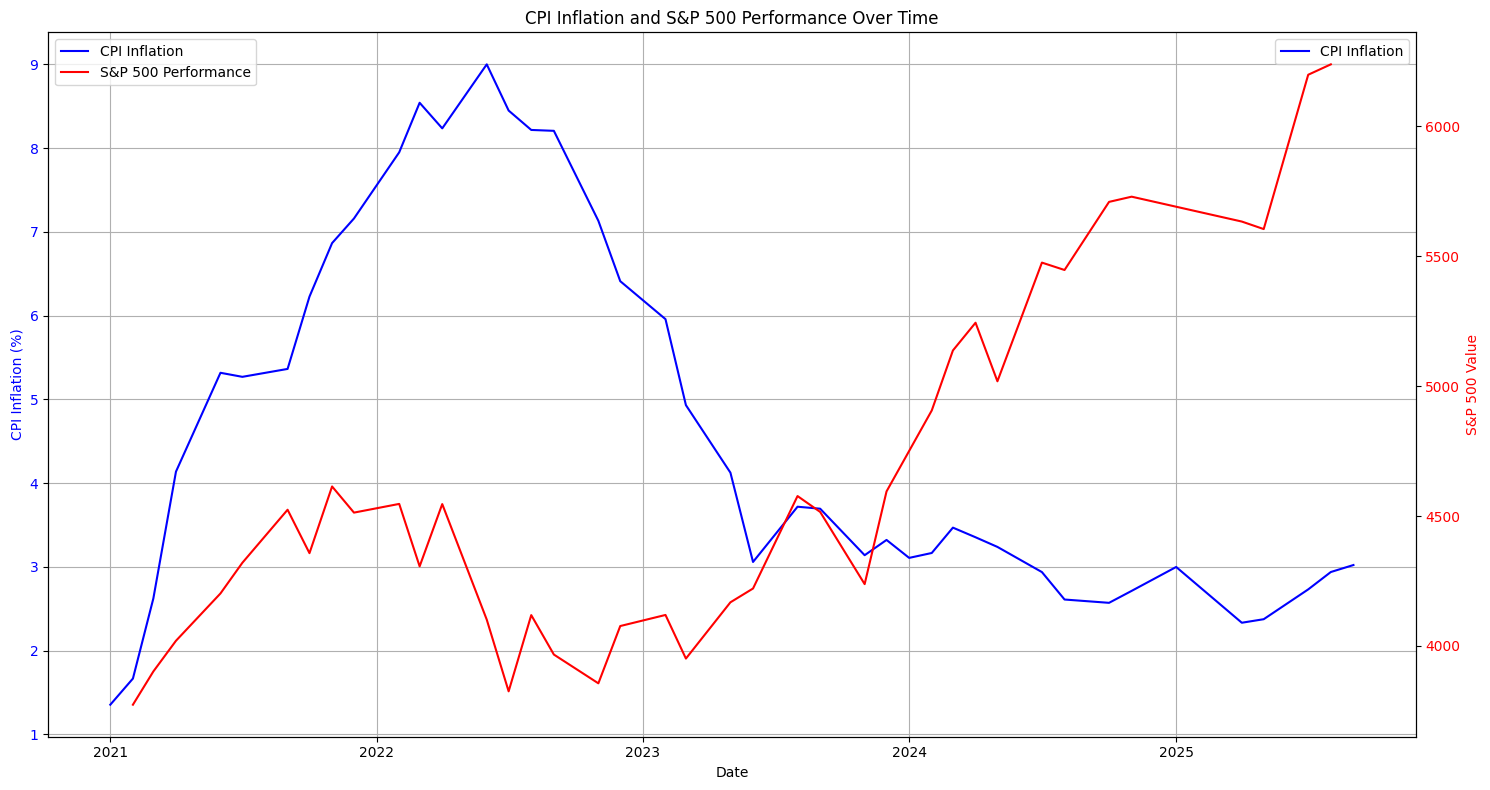

In [11]:
fig, ax1 = plt.subplots(figsize=(15, 8))

# Plot CPIAUCSL_PC1 on the first y-axis
sns.lineplot(x='observation_date', y='CPIAUCSL_PC1', data=merged_data, ax=ax1, color='blue', label='CPI Inflation')
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI Inflation (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('CPI Inflation and S&P 500 Performance Over Time')
ax1.grid(True)

# Create a second y-axis for SP500
ax2 = ax1.twinx()
sns.lineplot(x='observation_date', y='SP500', data=merged_data, ax=ax2, color='red', label='S&P 500 Performance')
ax2.set_ylabel('S&P 500 Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()